In [1]:
import numpy as np
import itertools
import scipy.sparse as sparse
import os
import pickle
from matplotlib import rcParams,font_manager
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
from mtgcardclassification import *

%load_ext autoreload
%autoreload 2

In [2]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [3]:
#change this to a local folder on your PC in which "scryfall-all-cards.txt" is stored
direc = 'C:/Users/svo/Documents/mtg/'

if os.path.exists(direc + 'scryfall-all-cards-pickled.txt'):
    print('using pre-generated all_cards')
    all_cards = pickle_load(direc,'scryfall-all-cards-pickled.txt')
else: 
    all_cards = load_all_cards(direc)

using pre-generated all_cards


In [4]:
len(all_cards)

357325

In [4]:
if os.path.exists(direc + 'scryfall-filtered-cards-pickled.txt'):
    print('using pre-generated filtered_cards')
    filtered_cards = pickle_load(direc,'scryfall-filtered-cards-pickled.txt')
else: 
    filtered_cards = get_filtered_cards(direc,all_cards)

using pre-generated filtered_cards


In [5]:
unique_card_names,num_reprints = np.unique([c['name'] for c in filtered_cards],return_counts = True)

In [6]:
most_reprinted_cards = np.array(list(zip(unique_card_names,num_reprints)))[np.argsort(num_reprints)[::-1]]
most_reprinted_cards[:20]

array([['Forest', '441'],
       ['Mountain', '438'],
       ['Swamp', '431'],
       ['Plains', '422'],
       ['Island', '421'],
       ['Evolving Wilds', '37'],
       ['Giant Growth', '32'],
       ['Sol Ring', '32'],
       ['Counterspell', '31'],
       ['Serra Angel', '30'],
       ['Swords to Plowshares', '30'],
       ['Terramorphic Expanse', '29'],
       ['Disenchant', '29'],
       ['Llanowar Elves', '28'],
       ['Lightning Bolt', '27'],
       ['Command Tower', '27'],
       ['Pacifism', '26'],
       ['Air Elemental', '26'],
       ['Fireball', '25'],
       ['Dark Ritual', '24']], dtype='<U33')

In [7]:
filtered_cards_no_reprints = [c for c in filtered_cards if not c['reprint']]
filtered_card_names_no_reprints = [c['name'] for c in filtered_cards_no_reprints]

_,index = np.unique(filtered_card_names_no_reprints,return_index=True)
unique_filtered_cards = [filtered_cards_no_reprints[i] for i in index]
print('Number of unique filtered cards:',len(unique_filtered_cards))

Number of unique filtered cards: 21911


In [8]:
sets,counts = np.unique([c['set_name'] for c in unique_filtered_cards],return_counts=True)
list(zip(sets[np.argsort(counts)],np.sort(counts)))

[('Dragon Con', 1),
 ('Limited Edition Beta', 2),
 ('Portal Demo Game', 4),
 ('Planechase', 4),
 ('Archenemy', 4),
 ('M19 Gift Pack', 5),
 ('HarperPrism Book Promos', 5),
 ('Game Night 2019', 5),
 ('Game Night', 5),
 ('Zendikar Rising Commander', 6),
 ('Kaldheim Commander', 16),
 ('Planechase 2012', 21),
 ('Secret Lair Drop', 22),
 ('Starter 1999', 27),
 ('Global Series Jiang Yanggu & Mu Yanling', 28),
 ('Jumpstart', 37),
 ('Crimson Vow Commander', 38),
 ('Midnight Hunt Commander', 38),
 ('Neon Dynasty Commander', 38),
 ('Commander 2013', 51),
 ('Conspiracy', 51),
 ('Commander 2011', 51),
 ('Commander 2018', 55),
 ('Commander 2014', 56),
 ('Commander 2015', 56),
 ('Commander 2016', 56),
 ('Commander 2017', 56),
 ('Commander 2019', 59),
 ('Forgotten Realms Commander', 62),
 ('Conspiracy: Take the Crown', 66),
 ('Commander 2020', 71),
 ('Arabian Nights', 76),
 ('Commander 2021', 81),
 ('Battlebond', 83),
 ('Antiquities', 84),
 ('Magic 2012', 95),
 ('Fallen Empires', 102),
 ('Magic 2013',

In [10]:
#illegal_cards = list(filter(lambda c: not c['legalities']['vintage'] in ['legal','restricted'], unique_filtered_cards))
#print([(c['name'],c['set_name']) for c in illegal_cards])
#[c['name'] for c in filtered_cards if c['legalities']['vintage'] == 'not_legal']

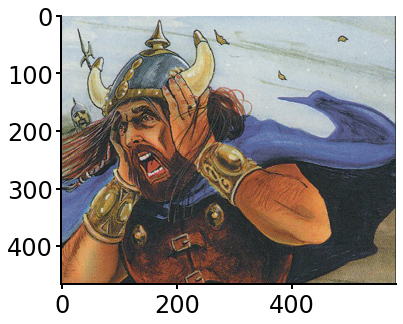

In [16]:
card = np.random.choice(filtered_cards_no_reprints)
art = get_cropped_art(card)
plt.imshow(art)
plt.show()

In [22]:
mono_colors = [['W'],['U'],['B'],['R'],['G']]
keys = ['name','power','toughness','type','subtype','manacost','oracletext']
m,matching_cards,inds = classify_card_colors_kfold(unique_filtered_cards,keys,10,mono_colors)

In [15]:
with open(direc + 'classification_model_5c_color_identity_pickled.txt','wb') as f:
    pickle.dump((m,matching_cards),f)

In [17]:
with open(direc + 'classification_model_5c_color_identity_pickled.txt','rb') as f:
    (m,matching_cards) = pickle.load(f)

In [18]:
most_predictive_features = get_most_predictive_features(m)
#Note: this does not work for binary classification, only 2+ colors
[(x,y,c,d[c]) for ((x,y),d,c) in most_predictive_features]

[('subtype', 'Merfolk', 'U', 2.810907983185011),
 ('oracletext', 'haste', 'R', 2.7844684312539925),
 ('subtype', 'Zombie', 'B', 2.775623464752927),
 ('subtype', 'Goblin', 'R', 2.7191243317044007),
 ('subtype', 'Druid', 'G', 2.4405133580153806),
 ('subtype', 'Angel', 'W', 2.429406417384221),
 ('subtype', 'Illusion', 'U', 2.4230225742467866),
 ('subtype', 'Elf', 'G', 2.353367101955193),
 ('oracletext', 'reach', 'G', 2.21549353500854),
 ('oracletext', 'deathtouch', 'B', 2.1894498784426446),
 ('subtype', 'Demon', 'B', 2.1883743298030565),
 ('subtype', 'Cleric', 'W', 2.1382684340481326),
 ('subtype', 'Vampire', 'B', 2.1251858509092347),
 ('oracletext', 'fear', 'B', 2.101510476917189),
 ('oracletext', 'vigilance', 'W', 2.07300151107922),
 ('subtype', 'Kor', 'W', 2.058024494475647),
 ('subtype', 'Soldier', 'W', 2.038248112825712),
 ('subtype', 'Skeleton', 'B', 1.956562037301863),
 ('subtype', 'Plant', 'G', 1.8859148905080796),
 ('oracletext', 'green', 'G', 1.8687993088486166),
 ('subtype', 'W

In [19]:
accuracy = np.mean(m.is_correct)
print(accuracy)

0.8084979411589187


In [20]:
def plot_predicted_dist(m,i,alpha=1):
    plt.bar(np.arange(0,len(m.unique_colors)),m.predicted_color_dists[i,:],alpha=alpha)
    plt.xticks(np.arange(0,len(m.unique_colors)),labels=m.unique_colors, rotation=90)
    plt.show()

def show_classification_info(m,cards,i,show_plot=True):
    card = cards[i]
    predicted_colors = m.unique_colors[np.argmax(m.predicted_color_dists[i,:])]
    
    features,importance,intercept = m.get_features_by_importance(i,predicted_colors)
    
    print('----------------')
    print("Card:",card['name'])
    print("Colors:",card["colors"])
    print("Mana cost:",card['mana_cost'])
    print("type:",card["type_line"])
    print("Predicted colors",[predicted_colors])
    print("Confidence:",m.confidence[i])
    print("Oracle text:",card['oracle_text'])
    print("Intercept:",intercept)
    print("Strongest features:",[(features[k],importance[k]) for k in np.argsort(importance)[::-1] if importance[k]>0][:10])
    if show_plot:
        plot_predicted_dist(m,i)

----------------
Card: Molten Psyche
Colors: ['R']
Mana cost: {1}{R}{R}
type: Sorcery
Predicted colors ['R']
Confidence: 0.9807794222836607
Oracle text: Each player shuffles the cards from their hand into their library, then draws that many cards.
Metalcraft — If you control three or more artifacts, Molten Psyche deals damage to each opponent equal to the number of cards that player has drawn this turn.
Intercept: 0.010656739385321438
Strongest features: [(('oracletext', 'deals'), 0.9818309371115436), (('oracletext', 'damage_to'), 0.5351457323474142), (('oracletext', 'molten'), 0.5249928202907727), (('oracletext', 'damage'), 0.5213150993672572), (('oracletext', 'to_each'), 0.438869102172209), (('oracletext', 'their_library'), 0.38676354787847267), (('oracletext', 'many_cards'), 0.3479243364475099), (('name', 'molten'), 0.34528732622705277), (('oracletext', 'has'), 0.3315776280933717), (('oracletext', 'then'), 0.32495472108814993)]


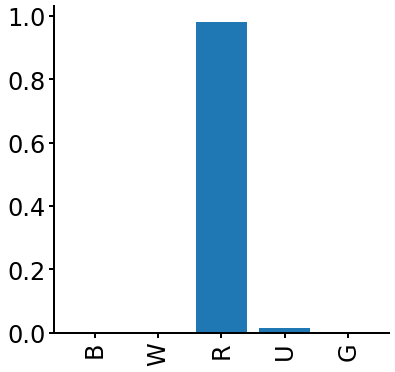

----------------
Card: Sure-Footed Infiltrator
Colors: ['U']
Mana cost: {3}{U}
type: Creature — Merfolk Rogue
Predicted colors ['U']
Confidence: 0.9998663578859406
Oracle text: Tap another untapped Rogue you control: Sure-Footed Infiltrator can't be blocked this turn.
Whenever Sure-Footed Infiltrator deals combat damage to a player, draw a card.
Intercept: 0.011734561320517685
Strongest features: [(('subtype', 'Merfolk'), 2.4693518415654143), (('oracletext', 'draw'), 0.9140050469865055), (('oracletext', "can't_be_blocked"), 0.8411776551754907), (('subtype', 'Rogue'), 0.6484320832470354), (('oracletext', "can't_be"), 0.645693003876224), (('oracletext', 'be_blocked'), 0.6454291206731941), (('oracletext', 'tap'), 0.5551951933815255), (('oracletext', 'blocked'), 0.477049963638671), (('oracletext', 'a_player'), 0.38040746638864054), (('oracletext', 'combat_damage_to_a_player'), 0.3357005763823644)]


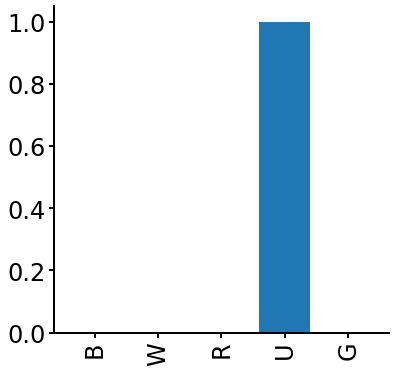

----------------
Card: Karametra's Acolyte
Colors: ['G']
Mana cost: {3}{G}
type: Creature — Human Druid
Predicted colors ['G']
Confidence: 0.9716176117468651
Oracle text: {T}: Add an amount of {G} equal to your devotion to green. (Each {G} in the mana costs of permanents you control counts toward your devotion to green.)
Intercept: 0.0223926885010864
Strongest features: [(('subtype', 'Druid'), 2.1465508855938134), (('oracletext', 'green'), 1.7144985506010106), (('type', 'Creature'), 0.7717490638701885), (('oracletext', 'equal_to'), 0.3038511546808608), (('oracletext', 'equal'), 0.21045454817893994), (('oracletext', '{t}_add'), 0.1605117629461647), (('oracletext', 'add'), 0.14328628706562369), (('toughness', '4'), 0.020181471825757573), (('manacost', '{@}'), 0.003299834799989058)]


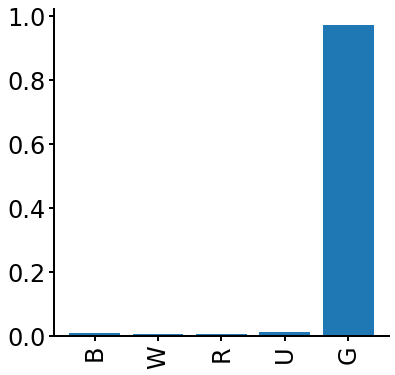

----------------
Card: Capashen Standard
Colors: ['W']
Mana cost: {W}
type: Enchantment — Aura
Predicted colors ['U']
Confidence: 0.46231386782051453
Oracle text: Enchant creature
Enchanted creature gets +1/+1.
{2}, Sacrifice Capashen Standard: Draw a card.
Intercept: 6.578663645512083e-05
Strongest features: [(('oracletext', 'draw'), 0.8689551309696013), (('oracletext', 'enchanted_creature'), 0.21070305270653913), (('oracletext', 'draw_a_card'), 0.16127239762752185), (('oracletext', 'enchanted'), 0.1387544228267401), (('oracletext', 'a_card'), 0.13659962366183717), (('oracletext', 'enchant'), 0.13566089207083556), (('subtype', 'Aura'), 0.11865384319456254), (('oracletext', 'card'), 0.09916674174267738), (('oracletext', '{2}'), 0.08299053407994912), (('type', 'Enchantment'), 0.07521785837503323)]


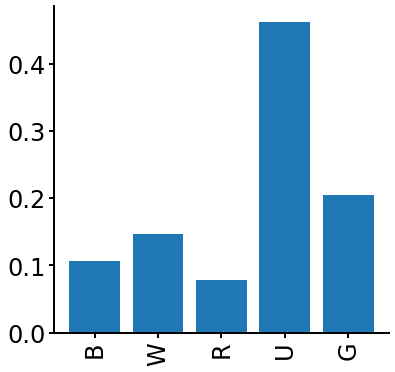

----------------
Card: Colossal Plow
Colors: []
Mana cost: {2}
type: Artifact — Vehicle
Predicted colors ['B']
Confidence: 0.6349684858203698
Oracle text: Whenever Colossal Plow attacks, add {W}{W}{W} and you gain 3 life. Until end of turn, you don't lose this mana as steps and phases end.
Crew 6 (Tap any number of creatures you control with total power 6 or more: This Vehicle becomes an artifact creature until end of turn.)
Intercept: -0.049881033894976924
Strongest features: [(('oracletext', 'and_you'), 1.1907037633408728), (('oracletext', 'life'), 1.0251681657391258), (('oracletext', 'lose'), 0.7310476926256106), (('oracletext', 'and_you_gain'), 0.7117093650662187), (('oracletext', '3'), 0.32979364848707843), (('oracletext', '3_life'), 0.223408245606529), (('toughness', '3'), 0.17758245459037117), (('oracletext', 'add_{@}{@}{@}'), 0.17643946158449908), (('oracletext', 'end_of'), 0.1631195118306414), (('oracletext', 'add'), 0.13859696283295656)]


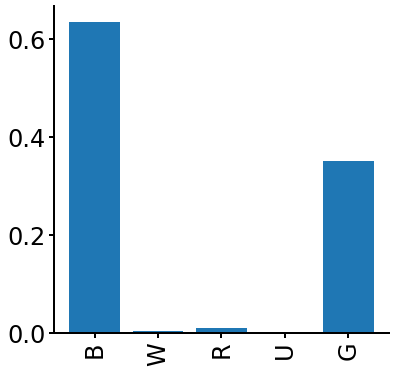

----------------
Card: Pyre Charger
Colors: ['R']
Mana cost: {R}{R}
type: Creature — Elemental Warrior
Predicted colors ['R']
Confidence: 0.9932815466567528
Oracle text: Haste
{R}: Pyre Charger gets +1/+0 until end of turn.
Intercept: 0.007627633524299435
Strongest features: [(('oracletext', 'haste'), 2.484550726756835), (('subtype', 'Elemental'), 0.8258870863835045), (('oracletext', '+1/+0'), 0.6425420838668424), (('subtype', 'Warrior'), 0.5324583583128143), (('toughness', '1'), 0.42183473797744525), (('oracletext', 'end'), 0.38472998309146206), (('oracletext', 'gets'), 0.37031885665685627), (('oracletext', '+1/+0_until'), 0.32861390490582887), (('oracletext', '+1/+0_until_end_of'), 0.32861390490582887), (('oracletext', '+1/+0_until_end'), 0.32861390490582887)]


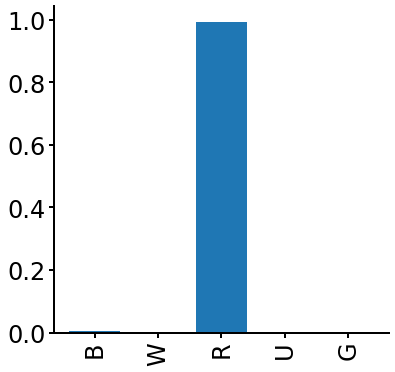

----------------
Card: Sadistic Sacrament
Colors: ['B']
Mana cost: {B}{B}{B}
type: Sorcery
Predicted colors ['U']
Confidence: 0.9137583410701466
Oracle text: Kicker {7} (You may pay an additional {7} as you cast this spell.)
Search target player's library for up to three cards, exile them, then that player shuffles. If this spell was kicked, instead search that player's library for up to fifteen cards, exile them, then that player shuffles.
Intercept: 0.0021725563893846894
Strongest features: [(('oracletext', 'cards'), 0.4552605388566918), (('oracletext', 'cards_exile'), 0.30723101510124584), (('oracletext', 'spell'), 0.27083652603291875), (('oracletext', 'cards_exile_them'), 0.24808464552655635), (('oracletext', 'cards_exile_them_then'), 0.19746007372714883), (('oracletext', 'player_shuffles'), 0.18728953915884625), (('oracletext', 'then'), 0.17670682907477958), (('oracletext', 'to'), 0.17626721164385478), (('oracletext', 'target'), 0.17339266409814885), (('oracletext', 'then_that_pla

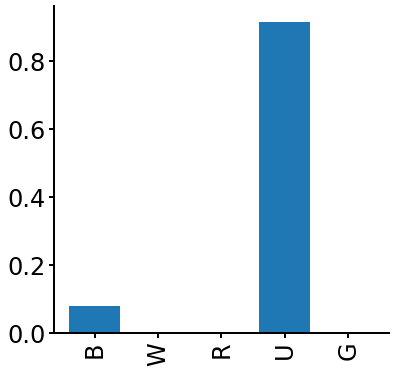

----------------
Card: Kavu Primarch
Colors: ['G']
Mana cost: {3}{G}
type: Creature — Kavu
Predicted colors ['G']
Confidence: 0.5420087221188641
Oracle text: Kicker {4} (You may pay an additional {4} as you cast this spell.)
Convoke (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for {1} or one mana of that creature's color.)
If Kavu Primarch was kicked, it enters the battlefield with four +1/+1 counters on it.
Intercept: 0.023511931902193323
Strongest features: [(('type', 'Creature'), 0.80518737075696), (('oracletext', '+1/+1'), 0.44392878589800056), (('oracletext', '+1/+1_counters'), 0.30506701332927555), (('oracletext', '+1/+1_counters_on'), 0.21108037967723844), (('oracletext', 'convoke'), 0.206446588294048), (('oracletext', 'on'), 0.1605017865476404), (('oracletext', 'kicked'), 0.1370508990636468), (('name', 'kavu'), 0.12262020121343702), (('oracletext', 'kavu'), 0.11575744815037556), (('oracletext', 'kicker'), 0.057029016032753885)]


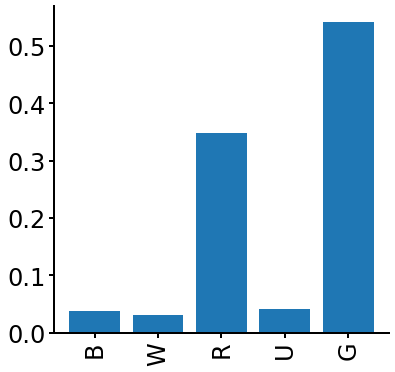

----------------
Card: Dread Drone
Colors: ['B']
Mana cost: {4}{B}
type: Creature — Eldrazi Drone
Predicted colors ['R']
Confidence: 0.4326940646003998
Oracle text: When Dread Drone enters the battlefield, create two 0/1 colorless Eldrazi Spawn creature tokens. They have "Sacrifice this creature: Add {C}."
Intercept: 0.0067095088399155515
Strongest features: [(('oracletext', 'add'), 0.554068885847573), (('toughness', '1'), 0.43572156543371243), (('oracletext', 'create'), 0.3298461912130936), (('power', '4'), 0.21670270631950297), (('oracletext', 'two'), 0.166109355616653), (('oracletext', 'enters'), 0.14847911709001607), (('oracletext', 'have'), 0.14185982020692883), (('oracletext', 'the'), 0.09089168044840656), (('type', 'Creature'), 0.08726826732528642), (('oracletext', 'tokens'), 0.077516169832971)]


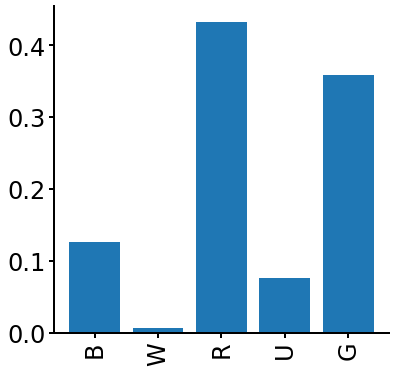

----------------
Card: Wormfang Turtle
Colors: ['U']
Mana cost: {2}{U}
type: Creature — Nightmare Turtle Beast
Predicted colors ['U']
Confidence: 0.888838333986981
Oracle text: When Wormfang Turtle enters the battlefield, exile a land you control.
When Wormfang Turtle leaves the battlefield, return the exiled card to the battlefield under its owner's control.
Intercept: 0.010583916933857893
Strongest features: [(('subtype', 'Turtle'), 0.7223878948558126), (('name', 'turtle'), 0.47194561457543444), (('oracletext', "owner's"), 0.41102821387405863), (('oracletext', 'control'), 0.2229282869003053), (('oracletext', 'control_when'), 0.2130990754313559), (('oracletext', 'a_land'), 0.20757057744224813), (('oracletext', 'to'), 0.18658953501603695), (('oracletext', 'exiled'), 0.1747609230070541), (('power', '2'), 0.17470949778123646), (('oracletext', 'wormfang'), 0.1594218214272503)]


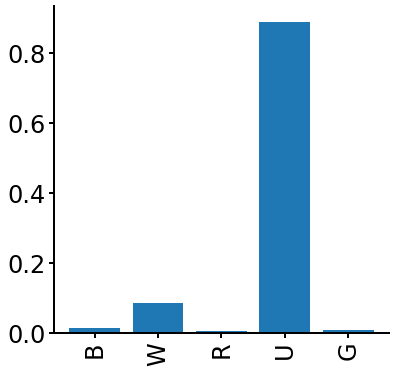

In [24]:
for _ in range(10):
    show_classification_info(m,matching_cards,np.random.randint(len(inds)))

In [25]:
for n in range(5):
    print('----------------')
    print("Most confidently correctly classified cards with " + str(n) + " word" + ("" if n==1 else "s") + " in the oracle text:")
    for color in m.unique_colors:
        if len(color)==1:
            priority = m.confidence*(m.unique_colors[m.predicted_color]==color)*[len(get_words_in_oracle_text(card))==n for card in matching_cards]
            #priority = (m.is_correct==0)*m.confidence*(m.unique_colors[m.predicted_color]==color)
            #and len(get_words_in_oracle_text(card))<10 for card in cards])
            ind = np.argsort(priority)[::-1]
            for i in ind[:1]:
                if priority[i]>0:
                    show_classification_info(m,matching_cards,i,False)

----------------
Most confidently correctly classified cards with 0 words in the oracle text:
----------------
Card: Gutter Skulk
Colors: ['B']
Mana cost: {1}{B}
type: Creature — Zombie Rat
Predicted colors ['B']
Confidence: 0.9634060045250384
Oracle text: 
Intercept: -0.05046176738443327
Strongest features: [(('subtype', 'Zombie'), 2.5076616812117276), (('subtype', 'Rat'), 1.5058151323575983), (('toughness', '2'), 0.17255481624515326), (('manacost', '{@}'), 0.05702554026962525), (('manacost', '{1}'), 0.0070765534630946765)]
----------------
Card: Keepers of the Faith
Colors: ['W']
Mana cost: {1}{W}{W}
type: Creature — Human Cleric
Predicted colors ['W']
Confidence: 0.889662554999523
Oracle text: 
Intercept: 0.017601330885981238
Strongest features: [(('subtype', 'Cleric'), 1.852275956860748), (('subtype', 'Human'), 0.7954114895894802), (('power', '2'), 0.6587659797566534), (('name', 'faith'), 0.2891657543394473), (('name', 'the'), 0.2430789120330715), (('manacost', '{1}'), 0.0393317250

----------------
Card: Vampire Nighthawk
Colors: ['B']
Mana cost: {1}{B}{B}
type: Creature — Vampire Shaman
Predicted colors ['B']
Confidence: 0.9985785767466586
Oracle text: Flying, deathtouch, lifelink
Intercept: -0.04760511568072302
Strongest features: [(('oracletext', 'deathtouch'), 1.9791450722922848), (('subtype', 'Vampire'), 1.910218564066589), (('oracletext', 'lifelink'), 1.5173131637830453), (('name', 'vampire'), 0.6317417207664139), (('subtype', 'Shaman'), 0.3814160174816199), (('oracletext', 'flying_deathtouch'), 0.2182101576225457), (('toughness', '3'), 0.15847062894368155), (('manacost', '{@}'), 0.026724496785320975), (('oracletext', 'flying'), 0.013897920358705395), (('manacost', '{1}'), 0.01135825986683509)]
----------------
Card: Noble Templar
Colors: ['W']
Mana cost: {5}{W}
type: Creature — Human Cleric Soldier
Predicted colors ['W']
Confidence: 0.9981454045874684
Oracle text: Vigilance
Plainscycling {2} ({2}, Discard this card: Search your library for a Plains card, r

In [26]:
print('----------------')
print("Most confidently incorrectly classified cards:")
for color in m.unique_colors:
    if len(color)==1:
        priority = (m.is_correct==0)*m.confidence*(m.unique_colors[m.predicted_color]==color)
        #and len(get_words_in_oracle_text(card))<10 for card in cards])
        ind = np.argsort(priority)[::-1]
        for i in ind[:3]:
            if priority[i]>0:
                show_classification_info(m,matching_cards,i,False)

----------------
Most confidently incorrectly classified cards:
----------------
Card: Viscerid Drone
Colors: ['U']
Mana cost: {1}{U}
type: Creature — Homarid Drone
Predicted colors ['B']
Confidence: 0.9999915046765457
Oracle text: {T}, Sacrifice a creature and a Swamp: Destroy target nonartifact creature. It can't be regenerated.
{T}, Sacrifice a creature and a snow Swamp: Destroy target creature. It can't be regenerated.
Intercept: -0.052058863157736425
Strongest features: [(('oracletext', 'destroy_target_creature'), 1.0322382054186945), (('oracletext', 'destroy'), 0.9789393109622546), (('oracletext', 'sacrifice_a_creature'), 0.9310770271636073), (('oracletext', 'swamp'), 0.6606368549961513), (('oracletext', 'sacrifice_a'), 0.39036277076820725), (('oracletext', 'a_swamp'), 0.3388244891067741), (('oracletext', 'sacrifice'), 0.3358231678682663), (('oracletext', 'target_nonartifact'), 0.29342982521707195), (('oracletext', 'creature'), 0.2858804474784619), (('oracletext', 'destroy_target

In [28]:
print('----------------')
print("Most confidently correctly classified cards:")
for color in m.unique_colors:
    if len(color)==1:
        priority = (m.is_correct==1)*(m.confidence)*(m.unique_colors[m.predicted_color]==color)
        #and len(get_words_in_oracle_text(card))<10 for card in cards])
        ind = np.argsort(priority)[::-1]
        for i in ind[:3]:
            if priority[i]>0:
                show_classification_info(m,matching_cards,i,False)

----------------
Most confidently correctly classified cards:
----------------
Card: Junji, the Midnight Sky
Colors: ['B']
Mana cost: {3}{B}{B}
type: Legendary Creature — Dragon Spirit
Predicted colors ['B']
Confidence: 0.9999999261098659
Oracle text: Flying, menace
When Junji, the Midnight Sky dies, choose one —
• Each opponent discards two cards and loses 2 life.
• Put target non-Dragon creature card from a graveyard onto the battlefield under your control. You lose 2 life.
Intercept: -0.05514306768013812
Strongest features: [(('oracletext', 'discards'), 1.394049989611853), (('oracletext', 'menace'), 1.182142381191872), (('oracletext', 'life'), 1.1566637360155574), (('oracletext', 'loses'), 0.8852192323858579), (('oracletext', 'you_lose'), 0.8095381757768672), (('oracletext', 'dies'), 0.8045294295472706), (('oracletext', 'lose'), 0.6393648661799369), (('oracletext', 'graveyard'), 0.6027528331889228), (('oracletext', 'opponent_discards'), 0.5196315353635071), (('oracletext', 'lose_2')

----------------
Card: Grizzly Bears
Colors: ['G']
Mana cost: {1}{G}
type: Creature — Bear
Predicted colors ['G']
Confidence: 0.6527952596163628
Oracle text: 
Intercept: 0.02177561457684795
Strongest features: [(('subtype', 'Bear'), 0.9621334237114412), (('type', 'Creature'), 0.8394303429393782), (('name', 'bears'), 0.12744602080562834), (('manacost', '{1}'), 0.0104372854928327)]


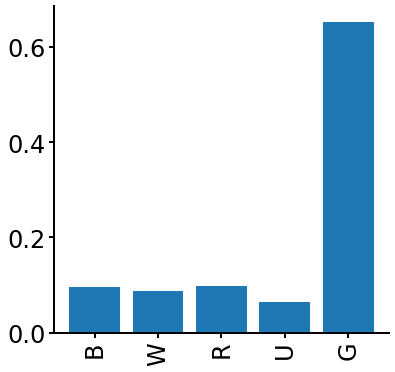

In [29]:
show_classification_info(m,matching_cards,get_card_index_by_name(matching_cards,'grizzly bears'))

In [24]:
num_colors = np.array([len(set(c1)) for c1 in m.card_colors])
colors_added = np.array([len(set(c1).difference(set(c2))) 
                         for c1,c2 in zip(m.unique_colors[m.predicted_color],m.card_colors)])
colors_omitted = np.array([len(set(c2).difference(set(c1))) 
                           for c1,c2 in zip(m.unique_colors[m.predicted_color],m.card_colors)])

In [25]:
sparse.csr_matrix((np.ones_like(colors_added),(num_colors,colors_added+colors_omitted))).toarray()

array([[    0,     0,     0],
       [13548,     0,  3209]], dtype=int32)

In [30]:
def plot_accuracy_by_key(f,keys=None,is_numeric=True,sort_by_count=True,xlabel='',return_values=False):
    fig,ax=plt.subplots(figsize=(12,6))
    x = np.array([f(c) for c in matching_cards])
    if keys==None:
        keys,counts = np.unique(x,return_counts=True)
        if sort_by_count:
            keys = keys[np.argsort(counts)][::-1]
    x_by_key = {key: m.is_correct[np.logical_and(x==key,m.confidence>0)] for key in keys}
    y = [np.mean(x) for key,x in x_by_key.items()]
    yerr = [np.std(x)/np.sqrt(len(x)) for key,x in x_by_key.items()]
    plt.errorbar(x=keys,y=y,yerr=yerr)
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    if not is_numeric:
        plt.xticks(np.arange(0,len(keys)),label=keys,rotation=90)
    plt.show()
    if return_values:
        return keys,y,yerr,x_by_key

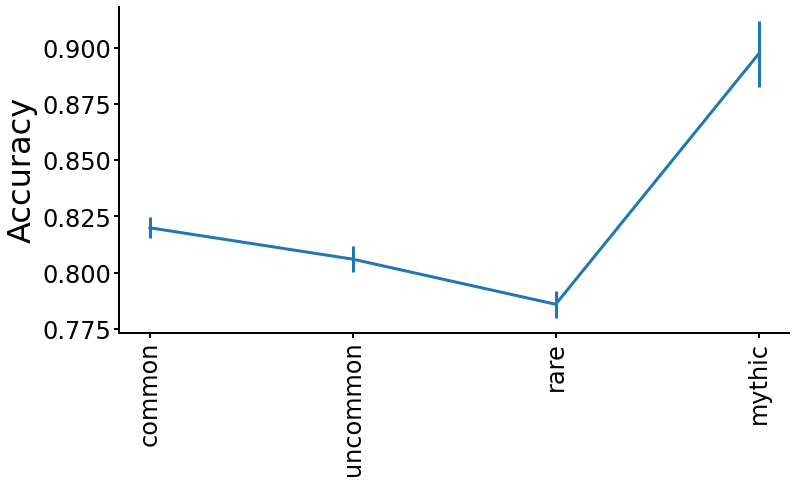

In [31]:
plot_accuracy_by_key(lambda c:c['rarity'],keys=['common','uncommon','rare','mythic'],is_numeric=False)

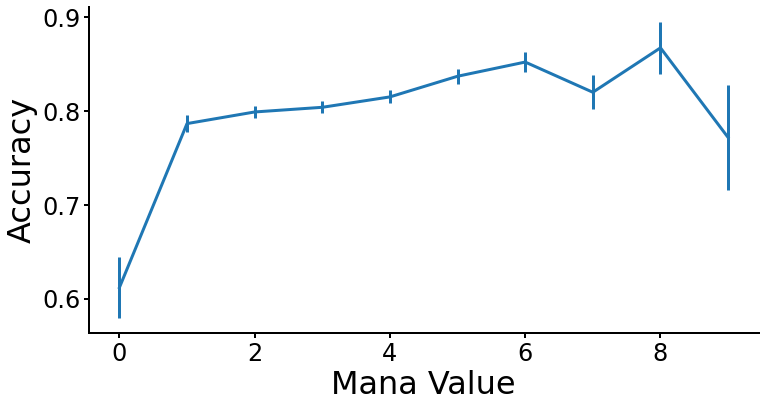

In [34]:
plot_accuracy_by_key(lambda c:c['cmc'],keys=range(10),xlabel='Mana Value')

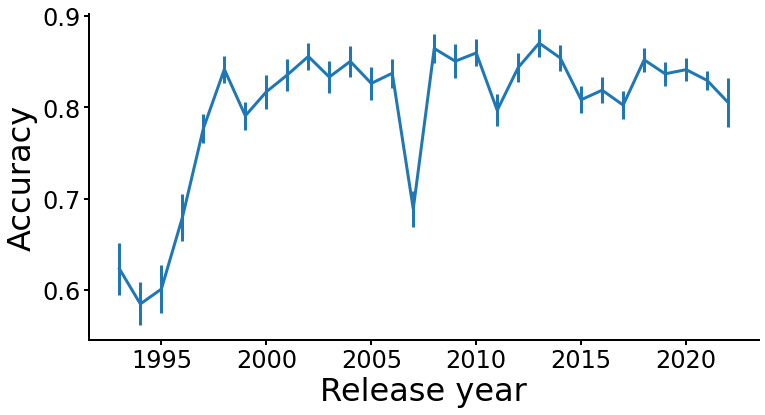

In [35]:
plot_accuracy_by_key(lambda c:int(c['released_at'].split('-')[0]),sort_by_count=False,xlabel='Release year')

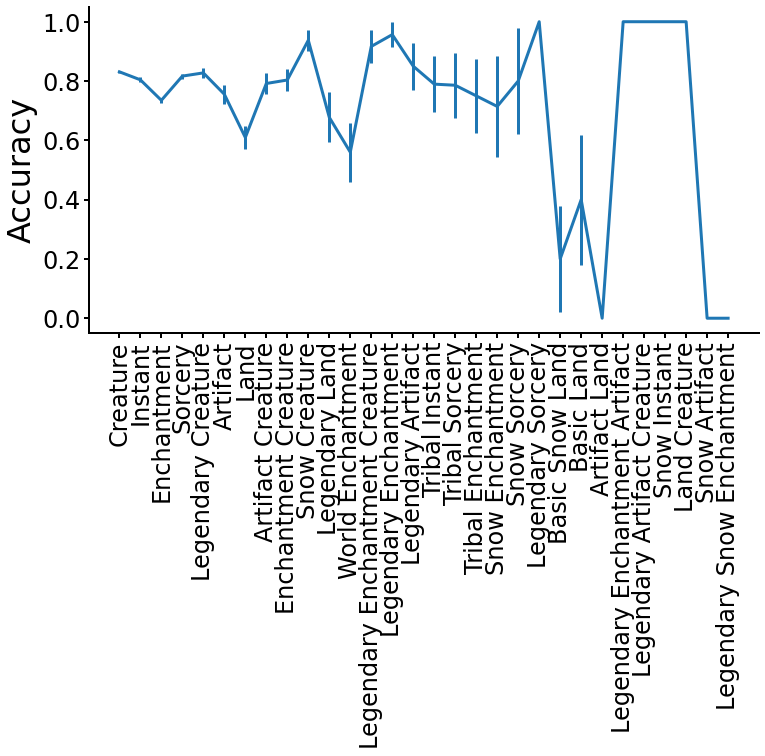

In [36]:
plot_accuracy_by_key(lambda c:c['type_line'].split(' — ')[0],is_numeric=False)


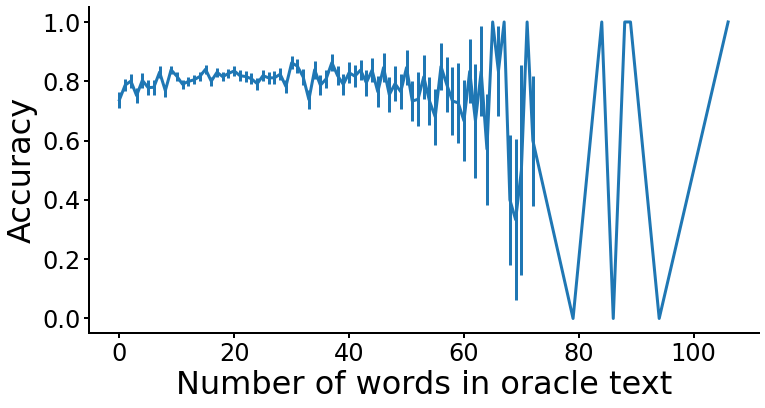

In [37]:
plot_accuracy_by_key(lambda c:len(get_words_in_oracle_text(c)),sort_by_count=False,xlabel='Number of words in oracle text')


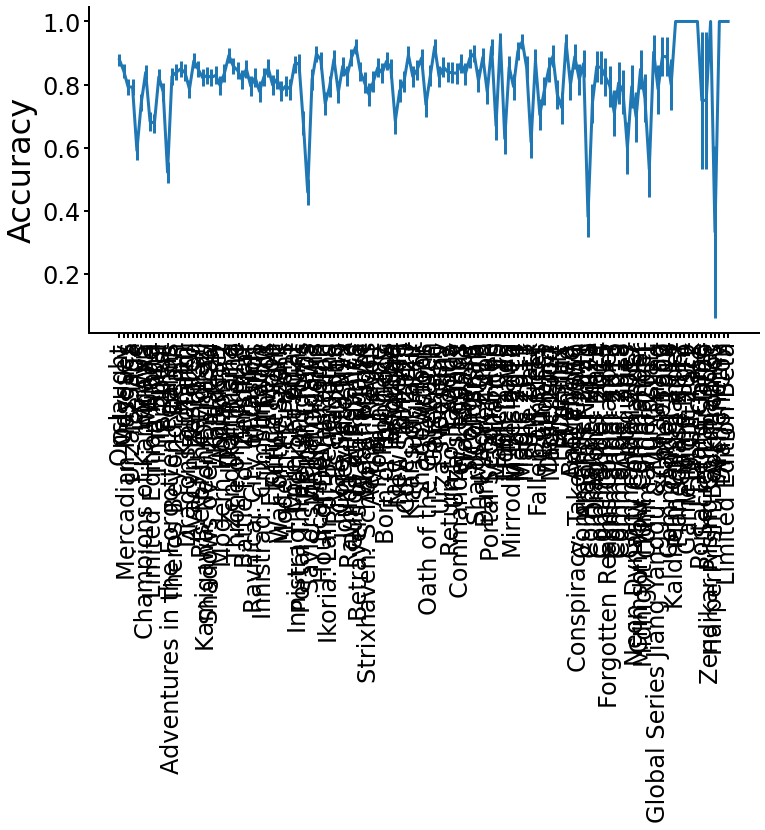

[('HarperPrism Book Promos', 3, 0.3333333333333333),
 ('Arabian Nights', 55, 0.38181818181818183),
 ('Planar Chaos', 148, 0.4594594594594595),
 ('Legends', 222, 0.5225225225225225),
 ('Commander 2011', 32, 0.53125),
 ('Ice Age', 252, 0.5912698412698413),
 ('Antiquities', 35, 0.6),
 ('The Dark', 89, 0.6179775280898876),
 ('Homelands', 97, 0.6288659793814433),
 ('Alliances', 103, 0.6699029126213593),
 ('Limited Edition Alpha', 236, 0.6779661016949152),
 ('Portal Three Kingdoms', 150, 0.68),
 ('Mirage', 237, 0.6835443037974683),
 ('Fate Reforged', 133, 0.6842105263157895),
 ('Neon Dynasty Commander', 33, 0.696969696969697),
 ('Fallen Empires', 88, 0.7045454545454546),
 ('Commander 2013', 38, 0.7105263157894737),
 ('Conflux', 77, 0.7272727272727273),
 ('Visions', 129, 0.7364341085271318),
 ('Hour of Devastation', 146, 0.7397260273972602),
 ('Commander 2020', 50, 0.74),
 ('Lorwyn', 249, 0.7429718875502008),
 ('Secret Lair Drop', 4, 0.75),
 ('Portal Demo Game', 4, 0.75),
 ('Midnight Hunt Com

In [34]:
keys,y,yerr,x_by_key = plot_accuracy_by_key(lambda c:c['set_name'],is_numeric=False,return_values=True,sort_by_count=True)
# This prints all the sets, plus the number of cards from that set and the model's 
# accuracy on predicting those cards' colors
list(zip(keys[np.argsort(y)],[x_by_key[key].shape[0] for key in keys[np.argsort(y)]],np.sort(y)))

In [ ]:
colors, confusion = get_confusion_matrix(m)
plt.imshow(confusion,cmap='Greens')
plt.xticks(np.arange(0,len(colors)),labels=colors,rotation=90)
plt.yticks(np.arange(0,len(colors)),labels=colors)
plt.show()

plt.imshow(np.triu(confusion,1)+np.tril(confusion,-1),cmap='Greens',origin='lower')
plt.xticks(np.arange(0,len(colors)),labels=colors)
plt.yticks(np.arange(0,len(colors)),labels=colors)
plt.colorbar()
plt.show()

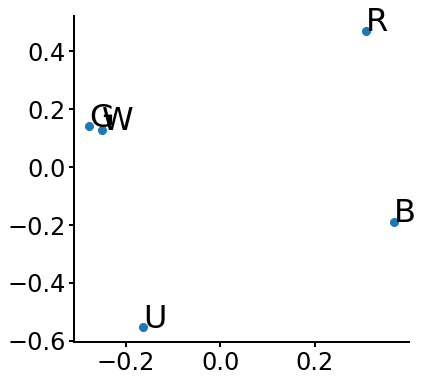

In [52]:
from sklearn.manifold import MDS
coords = MDS(n_components=2,dissimilarity='precomputed',metric=False,n_jobs=10).fit_transform(1-(confusion + confusion.T)/2)
plt.plot(coords[:,0],coords[:,1],'.')
for i in range(5):
    plt.text(coords[i,0],coords[i,1],s=['W','U','B','R','G'][i])
plt.show()

In [49]:
#p = m.predicted_color_dists

#JS = np.sum(p[None,:,:]*np.log(p[:,None,:]+p[None,:,:]),axis=2)+np.sum(p[:,None,:]*np.log(p[:,None,:]+p[None,:,:]),axis=2)
#plt.imshow(JS)
#plt.show()
#X = 1-np.dot(,m.predicted_color_dists.T)

In [38]:
#u,s,v = np.linalg.svd(p)

In [39]:
#import sklearn
#X_embedded = sklearn.decomposition.TruncatedSVD(n_components=2).fit_transform(p)
#N=len(cards)
#X_embedded = TSNE(n_components=2).fit_transform(JS[:N,:N])
#c_dict = {'R' : 'red', 'B' : 'black', 'G' : 'green', 'U' : 'blue', 'W' : 'yellow'}
#for c in colors:
#    ind = np.array(m.card_colors)[:N]==c
#    plt.plot(X_embedded[ind,0],X_embedded[ind,1],'.',color=c_dict[c])